# Project 2: Clustering

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics.cluster import contingency_matrix
from scipy.special import comb

import pylab as pl
from sklearn.decomposition import PCA

### Function to visualize the data

In [3]:
def plotcluster(X, y, plot_name):
    # dimension reduction with PCA
    pca = PCA(n_components=2).fit(X)
    pca_2d = pca.transform(X)
    
    pl.title(plot_name)
    pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y)
    pl.show()

### Clustering alorithms
Write the function to perform clustering using three algorithms with the appropriate input arguments

In [4]:
def Kmeansclustering(X, num_of_clusters):
    # Refer to the page: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    # Inputs: X is a N * M data matrix, where N denotes the number of data points, and M is the number of features
    #         num_of_clusters means the number of clusters
    # Output: the predicted labels for X, which is a vector with length N
    y_pred = KMeans(n_clusters = num_of_clusters).fit_predict(X)
    
    return y_pred

In [5]:
def Hierarchicalclustering(X, num_of_clusters):
    # Refer to the page: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
    # Inputs: X is a N * M data matrix, where N denotes the number of data points, and M is the number of features
    #         num_of_clusters means the number of clusters
    # Output: the predicted labels for X, which is a vector with length N
    
    y_pred = AgglomerativeClustering(n_clusters = num_of_clusters).fit_predict(X)
    
    return y_pred

In [6]:
def Densitybasedclustering(X, eps_value, min_samples_value):
    # Refer to the page: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
    # Inputs: X is a N * M data matrix, where N denotes the number of data points, and M is the number of features
    #         eps_value and min_samples_value are two parameters in DBSCAN
    # Output: the predicted labels for X, which is a vector with length N
    
    y_pred = DBSCAN(eps = eps_value, min_samples = min_samples_value).fit_predict(X)
    
    return y_pred

# Evaluation
Write the code to find F1, Rand Index and purity from the two vectors y (ground truth) and y_pred (predicted labels)

In [7]:
def clustering_metrics(y_true, y_pred):
    
    # obtain contingency matrix: P * C
    # P is the number of ground truth clusters
    # C is the number of clusters produced by the alogrithm
    cm = contingency_matrix(y_true, y_pred)
    
    # Refer to the page: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html
    # We can use the comb function to calculate “N choose k”
    #
    
    # For rand index and F1
    # step 1: tp + fp    
    tp_plus_fp = np.sum(comb(np.sum(cm, axis=0), 2))
    
    
    # step 2: tp + fn
    tp_plus_fn = np.sum(comb(np.sum(cm, axis=1), 2))
    
    # step 3: tp
    tp = np.sum(comb(cm,2))
    
    # step 4: fp, fn, tn
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(np.sum(cm), 2) - fp - fn - tp
    
    # rand index
    rand_index = (tp + tn) / (tp + fp + fn + tn)
    # F1
    F1 = (2 * tp) / (2 * tp + fp + fn)
    
    #-------------------
    # For purity
    numerator = np.sum(cm.max(axis = 0))
    denominator = np.sum(cm)
    purity = numerator / denominator
    
    return rand_index, F1, purity

## Begin code
### You DONOT need to change the following code. Visualize the data and evalute the performance to compare. 
(For the scatterplot: Notice the points included in the respective cluster - The colours of the clusters may differ for the reference plot and after performing clustering)

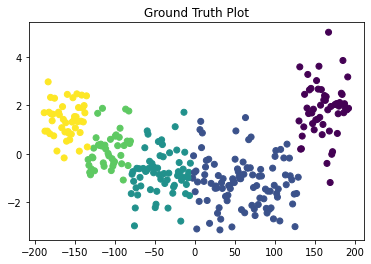

In [8]:
# main

# load data
# create X (features) and y (response)

X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_labels.csv')['1'].astype('int64').values

plotcluster(X, y, 'Ground Truth Plot')

Kmeans: K = 4
Rand index = 0.8732179872245018
F1 = 0.7296346414073072
Purity = 0.775974025974026


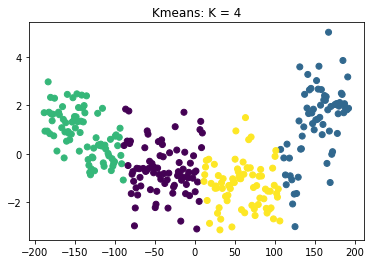

Kmeans: K = 5
Rand index = 0.8470535978679301
F1 = 0.6335579992905286
Purity = 0.7467532467532467


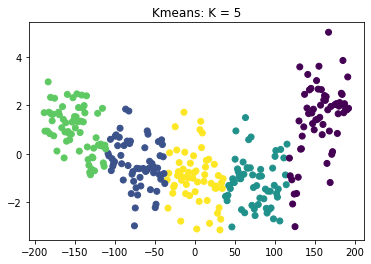

Kmeans: K = 6
Rand index = 0.9065950336308642
F1 = 0.7567746199603437
Purity = 0.9285714285714286


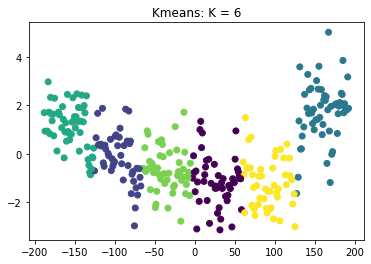

Kmeans: K = 7
Rand index = 0.8816362790304159
F1 = 0.6713262069775637
Purity = 0.8961038961038961


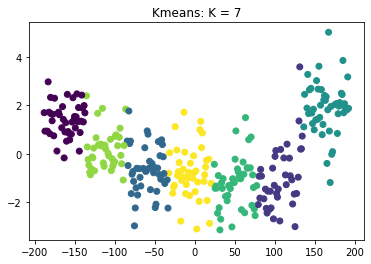

In [9]:
#Perform K-means clustering and evaluate performance

for num_of_clusters in range(4, 8):
    # Kmeans
    y_pred = Kmeansclustering(X, num_of_clusters)
    
    # evaluation metrics
    rand_index, F1, purity = clustering_metrics(y, y_pred)
    print('Kmeans: K =', num_of_clusters)
    print('Rand index =', rand_index)
    print('F1 =', F1)
    print('Purity =', purity)
    
    plotcluster(X, y_pred, 'Kmeans: K = ' + str(num_of_clusters))

Hierarchical clustering: K = 4
Rand index = 0.7924827615381361
F1 = 0.5663646408839779
Purity = 0.6103896103896104


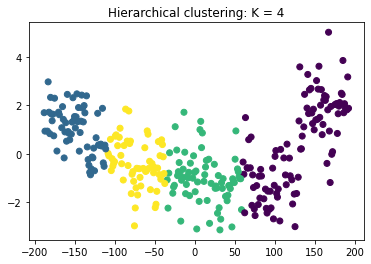

Hierarchical clustering: K = 5
Rand index = 0.8352299166631414
F1 = 0.6094455028577158
Purity = 0.75


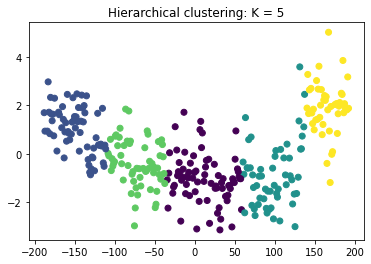

Hierarchical clustering: K = 6
Rand index = 0.8390371843140573
F1 = 0.5901109555100722
Purity = 0.7694805194805194


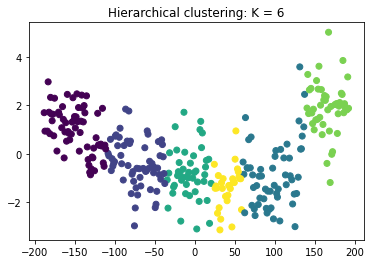

Hierarchical clustering: K = 7
Rand index = 0.8395871229747451
F1 = 0.5666285714285715
Purity = 0.7727272727272727


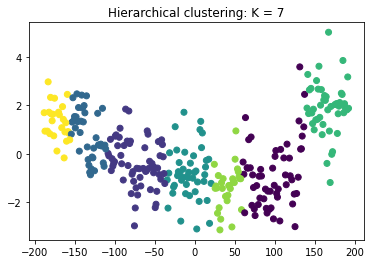

In [10]:
#Perform Hierarchical clustering and evaluate performance

for num_of_clusters in range(4, 8):
    # Hierarchical clustering
    y_pred = Hierarchicalclustering(X, num_of_clusters)
    
    # evaluation metrics
    rand_index, F1, purity = clustering_metrics(y, y_pred)
    print('Hierarchical clustering: K =', num_of_clusters)
    print('Rand index =', rand_index)
    print('F1 =', F1)
    print('Purity =', purity)

    plotcluster(X, y_pred, 'Hierarchical clustering: K = ' + str(num_of_clusters))

Density-based Clustering: eps = 3, min_samples = 3
Rand index = 0.7906425821735268
Clustering F1 = 0.21407019215499445
Clustering Purity = 0.8928571428571429


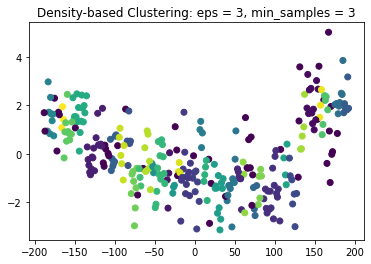

Density-based Clustering: eps = 3, min_samples = 4
Rand index = 0.7433267058674224
Clustering F1 = 0.2480946774893116
Clustering Purity = 0.7954545454545454


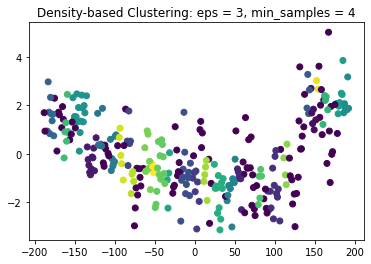

Density-based Clustering: eps = 3, min_samples = 5
Rand index = 0.5697364524726088
Clustering F1 = 0.3307231690465223
Clustering Purity = 0.5681818181818182


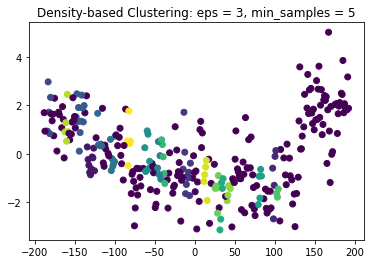

Density-based Clustering: eps = 3, min_samples = 6
Rand index = 0.21951013156224883
Clustering F1 = 0.35999722492021646
Clustering Purity = 0.3246753246753247


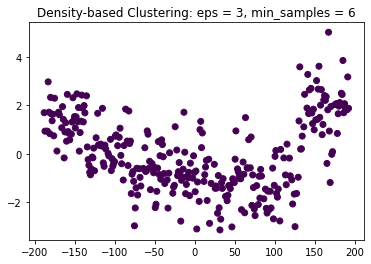

Density-based Clustering: eps = 4, min_samples = 3
Rand index = 0.8083040737763865
Clustering F1 = 0.5733653438779833
Clustering Purity = 0.7272727272727273


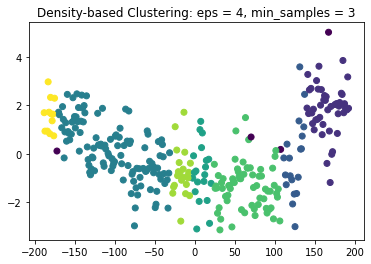

Density-based Clustering: eps = 4, min_samples = 4
Rand index = 0.8342357967765134
Clustering F1 = 0.47603128969713177
Clustering Purity = 0.8798701298701299


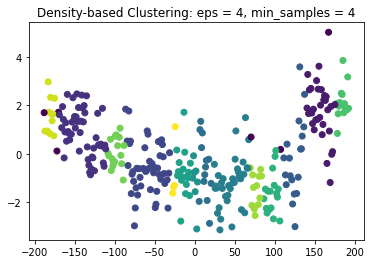

Density-based Clustering: eps = 4, min_samples = 5
Rand index = 0.8268116248572275
Clustering F1 = 0.3705412054120541
Clustering Purity = 0.9383116883116883


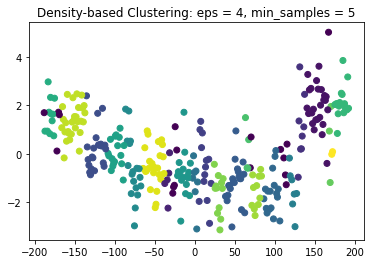

Density-based Clustering: eps = 4, min_samples = 6
Rand index = 0.7888658572697661
Clustering F1 = 0.3041962916492402
Clustering Purity = 0.8538961038961039


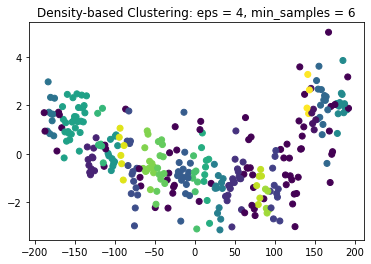

Density-based Clustering: eps = 5, min_samples = 3
Rand index = 0.5537882313126613
Clustering F1 = 0.45802075840098655
Clustering Purity = 0.5


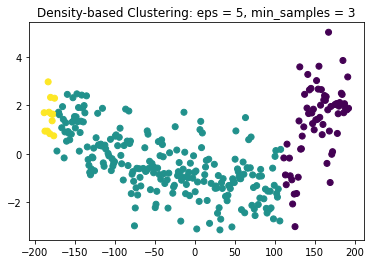

Density-based Clustering: eps = 5, min_samples = 4
Rand index = 0.5537882313126613
Clustering F1 = 0.45802075840098655
Clustering Purity = 0.5


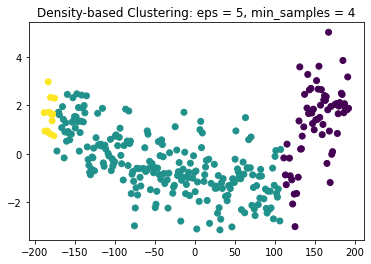

Density-based Clustering: eps = 5, min_samples = 5
Rand index = 0.7312703583061889
Clustering F1 = 0.5421126608281976
Clustering Purity = 0.6461038961038961


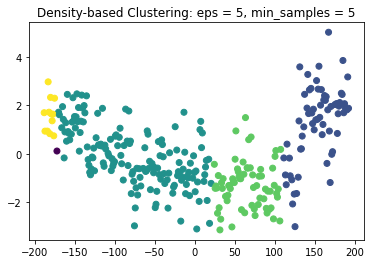

Density-based Clustering: eps = 5, min_samples = 6
Rand index = 0.7893311899826558
Clustering F1 = 0.5469432314410481
Clustering Purity = 0.6525974025974026


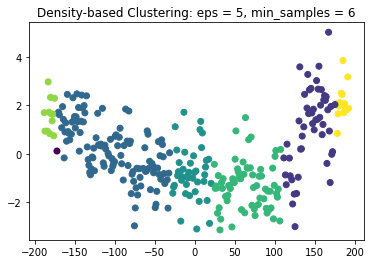

Density-based Clustering: eps = 6, min_samples = 3
Rand index = 0.21951013156224883
Clustering F1 = 0.35999722492021646
Clustering Purity = 0.3246753246753247


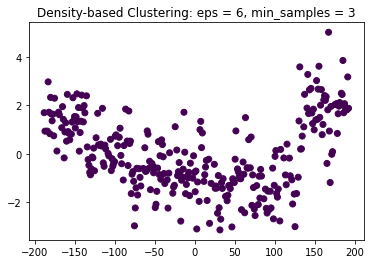

Density-based Clustering: eps = 6, min_samples = 4
Rand index = 0.21951013156224883
Clustering F1 = 0.35999722492021646
Clustering Purity = 0.3246753246753247


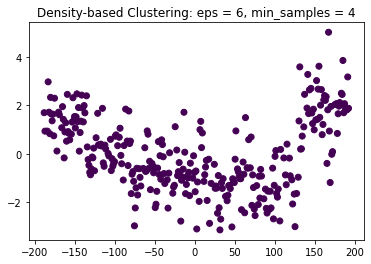

Density-based Clustering: eps = 6, min_samples = 5
Rand index = 0.21951013156224883
Clustering F1 = 0.35999722492021646
Clustering Purity = 0.3246753246753247


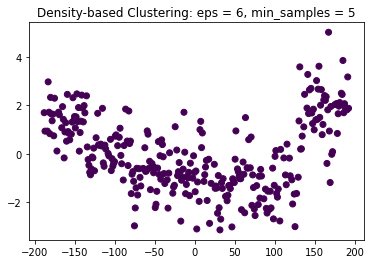

Density-based Clustering: eps = 6, min_samples = 6
Rand index = 0.21951013156224883
Clustering F1 = 0.35999722492021646
Clustering Purity = 0.3246753246753247


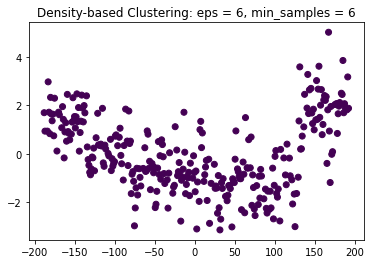

In [11]:
#Perform density based clustering and evaluate performance

for eps_value in range(3, 7):
    for min_samples_value in range(3, 7):
        # DBSCAN
        y_pred = Densitybasedclustering(X, eps_value, min_samples_value)

        rand_index, F1, purity = clustering_metrics(y, y_pred)
        
        print('Density-based Clustering: eps = ' + str(eps_value) + ', min_samples = '+ str(min_samples_value))
        print('Rand index =', rand_index)
        print('Clustering F1 =', F1)
        print('Clustering Purity =', purity)

        plotcluster(X, y_pred, 'Density-based Clustering: eps = ' + str(eps_value) + ', min_samples = '+ str(min_samples_value))